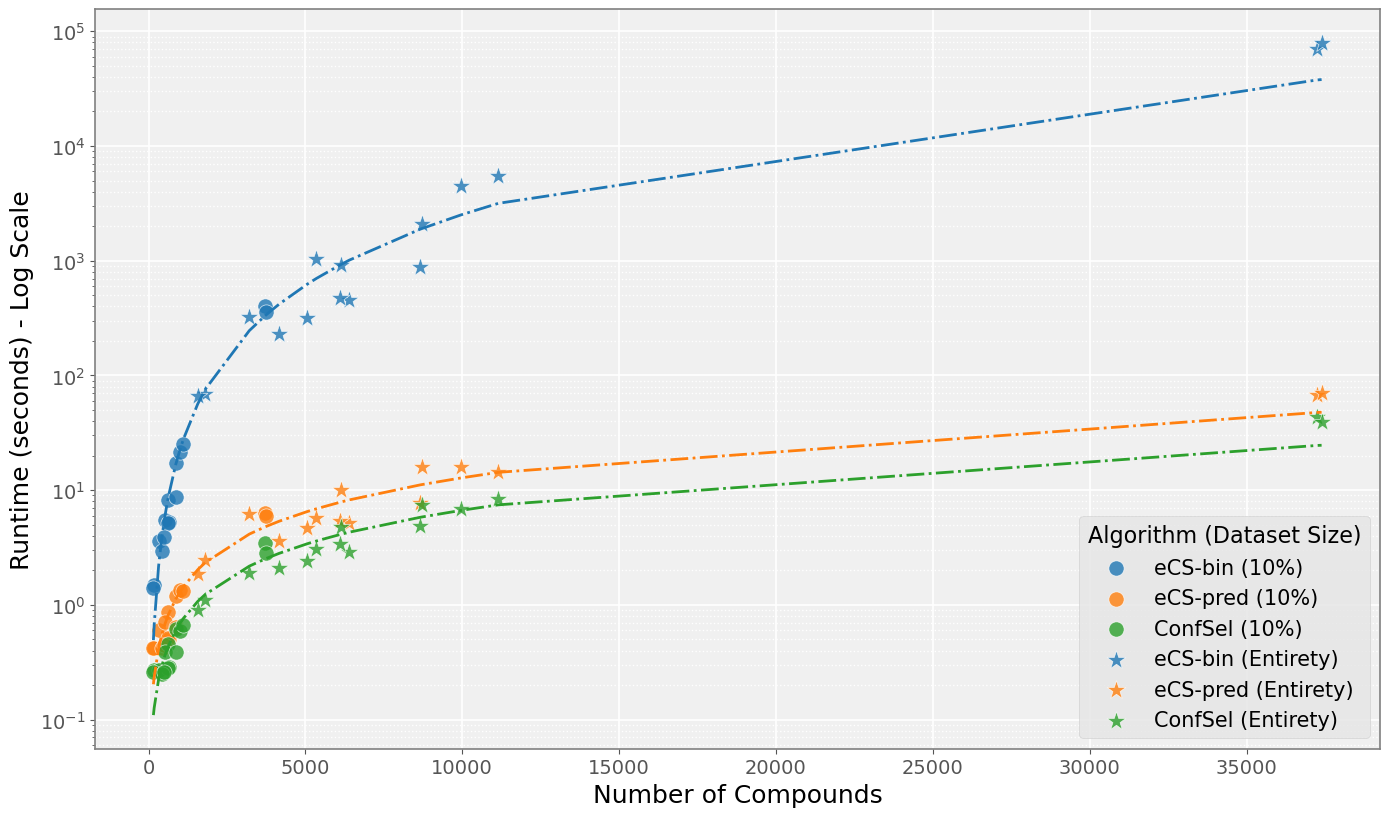

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the table you provided
data = {
    'Dataset': ['3A4', 'CB1', 'DPP4', 'HIVINT', 'HIVPROT', 'LOGD', 'METAB', 'NK1', 'OX1', 'OX2', 'PGP', 'PPB', 'RAT_F', 'TDI', 'THROMBIN'],
    'subset_compounds': [3724, 871, 614, 181, 321, 3738, 156, 996, 535, 1115, 639, 865, 610, 416, 505],
    'subset_eCS-bin': [405.04, 17.42, 8.27, 1.50, 3.59, 357.24, 1.40, 21.41, 5.53, 25.21, 5.32, 8.68, 5.15, 2.96, 3.89],
    'subset_eCS-pred': [6.37, 1.20, 0.86, 0.42, 0.60, 5.99, 0.42, 1.36, 0.71, 1.32, 0.50, 0.64, 0.52, 0.42, 0.45],
    'subset_ConfSel': [3.45, 0.62, 0.46, 0.27, 0.27, 2.82, 0.26, 0.59, 0.39, 0.67, 0.29, 0.39, 0.28, 0.25, 0.26],
    'entirety_compounds': [37241, 8716, 6148, 1815, 3212, 37388, 1569, 9965, 5351, 11151, 6399, 8651, 6105, 4165, 5059],
    'entirety_eCS-bin': [69772.69, 2089.76, 920.32, 68.30, 325.55, 79632.30, 66.22, 4507.54, 1032.14, 5518.00, 454.84, 889.71, 471.59, 230.02, 318.90],
    'entirety_eCS-pred': [67.67, 16.08, 10.04, 2.48, 6.25, 70.51, 1.86, 15.99, 5.76, 14.30, 5.13, 7.78, 5.41, 3.61, 4.70],
    'entirety_ConfSel': [43.27, 7.46, 4.78, 1.11, 1.91, 38.97, 0.90, 6.85, 3.07, 8.33, 2.91, 4.90, 3.41, 2.12, 2.42]
}

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)
plt.style.use('ggplot')

# Set up the plot figure
fig, ax = plt.subplots(figsize=(14, 9))
# fig.suptitle('Algorithm Runtime Analysis (Combined)', fontsize=18, fontweight='bold')

# Define colors for consistent plotting
colors = {
    'eCS-bin': '#1f77b4',
    'eCS-pred': '#ff7f0e',
    'ConfSel': '#2ca02c'
}

# --- Plot all data on a single axis ---

# Plot 10% Subsets data with circle markers
ax.scatter(df['subset_compounds'], df['subset_eCS-bin'], label='eCS-bin (10%)', alpha=0.8, edgecolors='w', s=120, c=colors['eCS-bin'], marker='o')
ax.scatter(df['subset_compounds'], df['subset_eCS-pred'], label='eCS-pred (10%)', alpha=0.8, edgecolors='w', s=120, c=colors['eCS-pred'], marker='o')
ax.scatter(df['subset_compounds'], df['subset_ConfSel'], label='ConfSel (10%)', alpha=0.8, edgecolors='w', s=120, c=colors['ConfSel'], marker='o')

# Plot Entirety data with star markers
ax.scatter(df['entirety_compounds'], df['entirety_eCS-bin'], label='eCS-bin (Entirety)', alpha=0.8, edgecolors='w', s=200, c=colors['eCS-bin'], marker='*')
ax.scatter(df['entirety_compounds'], df['entirety_eCS-pred'], label='eCS-pred (Entirety)', alpha=0.8, edgecolors='w', s=200, c=colors['eCS-pred'], marker='*')
ax.scatter(df['entirety_compounds'], df['entirety_ConfSel'], label='ConfSel (Entirety)', alpha=0.8, edgecolors='w', s=200, c=colors['ConfSel'], marker='*')

# Set labels and title
ax.set_xlabel('Number of Compounds', fontsize=18, color='black')
ax.set_ylabel('Runtime (seconds) - Log Scale', fontsize=18, color='black')
# ax.set_title('Runtime vs. Compounds (10% Subsets and Entirety)', fontsize=16, fontweight='bold')

for alg_name, color in colors.items():
    # Combine subset and entirety data for fitting
    x_data = pd.concat([df['subset_compounds'], df['entirety_compounds']])
    y_data = pd.concat([df[f'subset_{alg_name}'], df[f'entirety_{alg_name}']])

    # Perform a linear fit on the log-transformed data
    coeffs = np.polyfit(np.log(x_data), np.log(y_data), 1)
    poly = np.poly1d(coeffs)

    # Generate points for the trend line
    x_line = np.sort(x_data)
    y_line_log = poly(np.log(x_line))
    y_line = np.exp(y_line_log) # Transform back from log space

    # Plot the trend line
    ax.plot(x_line, y_line, color=color, linestyle='-.', linewidth=2)

# Use a logarithmic scale for the y-axis
ax.set_yscale('log')

# Customize the plot
ax.legend(title='Algorithm (Dataset Size)', title_fontsize=16, fontsize=15, loc='lower right')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_facecolor('#f0f0f0')

ax.grid(which='major', linestyle='-', linewidth='1.2')
ax.grid(which='minor', linestyle=':', linewidth='1')
ax.tick_params(axis='both', labelsize=14)

for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_edgecolor('gray')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("runtime_vis.pdf")

In [ ]:
import pandas as pd
import os

model = 'rf'
sample = 1.00

df_list = []
dataset_list = ['3A4', 'CB1', 'DPP4', 'HIVINT', 'HIVPROT', 'LOGD', 'METAB', 'NK1', 'OX1', 'OX2', 'PGP', 'PPB', 'RAT_F', 'TDI', 'THROMBIN']

for name in dataset_list:
    df_ones = []
    for j in range(1, 1+100):
        try:
            df = pd.read_csv(os.path.join(f"result", model, f"{sample:.2f}", f"{name} {sample:.2f}", f"{name} {sample:.2f} {j}.csv"))
        except FileNotFoundError as e:
            print(e)
        df_ones.append(df)
    df = pd.concat(df_ones).groupby("fdp_nominals", as_index=False).mean()

    # if to only 0.5
    # df = df[df['fdp_nominals'] <= 0.5]
    df_list.append(df)

In [27]:
q = 0.1
for df in df_list:
    df = df[df['fdp_nominals'] == q]
    print(df['fdps_cs'].mean(), df['fdps_15_rb'].mean())
    print(df['powers_cs'].mean() / df['powers_15_rb'].mean())

0.09904283370893524 0.0985238838811573
1.3354034879436056
0.10267329284506432 0.13220898195587405
0.8136819699677401
0.10210649460982975 0.1599173706117201
0.796195967528006
0.09780056037022442 0.173938747184886
0.701485641524408
0.09373412698412699 0.22392739716423926
0.3548956312684747
0.09910345039884318 0.1045283919985829
0.7730469267145715
0.10230170714291432 0.1515610779863753
0.8029029529650615
0.09894092514854684 0.12411326718632923
0.591329555637843
0.09686670338480811 0.23390526755421123
0.1503265859376468
0.09810537680922543 0.10483454033572949
0.9744146034885889
0.10197326576378053 0.1398954875576726
0.680407579421266
0.10207192600662926 0.10612477093419097
0.9118561686183742
0.07091853132247868 0.19345686323396508
0.2432415061688135
0.09764235583817626 0.18723232148043226
0.19511140343799757
0.10141451203379749 0.10506672689755195
0.984262969397241


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sys
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from utility import thresholds_map

def get_model(mdl_str):
    if mdl_str == 'rf':
        return RandomForestRegressor(n_estimators=100, max_depth=20, max_features='sqrt')
    if mdl_str == 'lin':
        return LinearRegression()
    if mdl_str == 'nn':
        return MLPRegressor(hidden_layer_sizes=[32, 32], max_iter=1000)

dataset_name = '3A4'
dataset_path = os.path.join('data', f'{dataset_name}_training_disguised.csv')

dataset = pd.read_csv(dataset_path)

threshold = thresholds_map[dataset_name]

total_Y = dataset['Act'].to_numpy()
total_X = dataset.drop(columns=['MOLECULE', 'Act']).to_numpy()

Xtc, Xtest, Ytc, Ytest = train_test_split(total_X, total_Y, test_size=15/100, shuffle=True) # split 15% as the test data, and the rest for train and calib (tc)
Xtrain, Xcalib, Ytrain, Ycalib = train_test_split(Xtc, Ytc, train_size=50/85, shuffle=True)
mdl = get_model('nn')
mdl.fit(Xtrain, Ytrain < threshold)

print(r2_score(Ytest < threshold, mdl.predict(Xtest)))

0.14919310439158928
